COPYRIGHT © 2018 Kiran Arun <kironni@gmail.com>

### Setup

In [1]:
# get dependencies
!rm -r Reinforcement_Learning-101-demo/
!git clone -b improvements https://github.com/KiranArun/Reinforcement_Learning-101-demo.git
from google.colab import auth
auth.authenticate_user()
!chmod +x Reinforcement_Learning-101-demo/scripts/setup.sh
!./Reinforcement_Learning-101-demo/scripts/setup.sh

Cloning into 'Reinforcement_Learning-101-demo'...
remote: Counting objects: 238, done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 238 (delta 38), reused 60 (delta 20), pack-reused 155
Receiving objects: 100% (238/238), 12.58 MiB | 26.90 MiB/s, done.
Resolving deltas: 100% (122/122), done.
Getting files from drive
Updating...


Installing cmake...


Installing ffmpeg...


Installing gym...
Installing opencv...


# Rreinforcement Learning Definitions

In [0]:
import numpy as np                     # our linear algebra library
import matplotlib.pyplot as plt        # our plotting library
import tensorflow as tf                # our machine learning library

import gym                             # the environment library
import cv2                             # our image processing library

import time,os,sys
from IPython.display import HTML,Image # to show videos and images

import A3C_helper_functions as helper  # helper functions

## State

The state is what the current environment looks like.

$s_t$ at time step $t$

For us, it's the current frame of the game.

Below images:
- left - output of the environment
- right - the processed frame, since this is what we use as input, this is our state

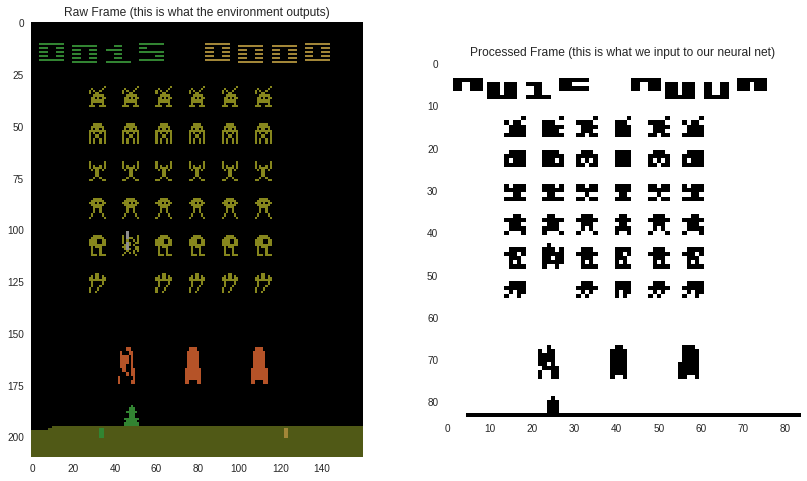

In [3]:
fig,ax = plt.subplots(1,2, figsize=(14,8))
helper.Display_example_frames(fig,ax)

## Policy

This is the part making the probabilities for the actions.

## $\pi$

## Reward

The score increment at the current step.

### $r_t$ at time step $t$
 
When the Environment takes a step, you'll get a reward (points for whatever happened).

The **Total Reward** is all rewards summed up for that game.

## $R = \sum_{t=0}^{\infty}r_t$

## Discount

When calculate the value, we want to prioritise rewards in the near future.

## $d(x,\gamma)_t = \sum_{k=0}\gamma^kx_{t+k}$

- this stops the total reward becomming infinite
- this means it would rather get reward sooner rather than later

The bigger **Gamma** ($\gamma$) is, the more we take into consideration long term rewards.

## Value

This is the total future reward, starting from the current state.

## $V(s_t;\pi) = \sum_{k=0}^{\infty}r_{t+k}$

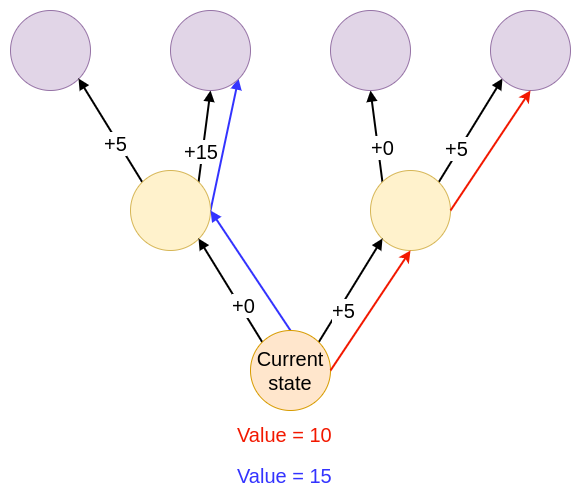

In [4]:
Image('Reinforcement_Learning-101-demo/imgs/Value_diagram.png')

## Boltzmann approach

This is a method of picking actions to play out.

We have 6 possible actions, and get a probability for each (using the policy):

- if we pick at random, we are going to end up picking actions we already know we shouldn't pick
- if we choose the most likely option, we wont explore enough (try different actions out)
- we pick actions at random based on their probabilities

The action probabilities will look something like this:

$
\begin{bmatrix}
0.002 & 0.03 & 0.82 & 0.01 & 0.13 & 0.008
\end{bmatrix}
$

## Advantage

This is a way of critiquing the actions taken by comparing them to the actions with the highest probability.

## $a_t = \sum_{k=0}^K \gamma^k(r_{t+k} + \gamma v_{t+k+1} - v_{t+k})$

- $r_{t+k} + \gamma v_{t+k+1}$ = reward from step $t+k$ + predicted total future rewards given current policy from step $t+k+1$
- $v_{t+k}$ = predicted total future rewards given current policy from step $t+k$

This basically means:
> total rewards from choosing the action we took vs total rewards from choosing the action based on the current policy

- $a > 0$ means action taken was better than current policy
- $a < 0$ means action taken was worse than current policy

---

In the diagram below, we're using the red policy (we take red actions).

You can try calculating the advantages for different actions.

We keep using the red policy but because we use the boltzmann approach we wont always take the red action.

Advantage diagram:


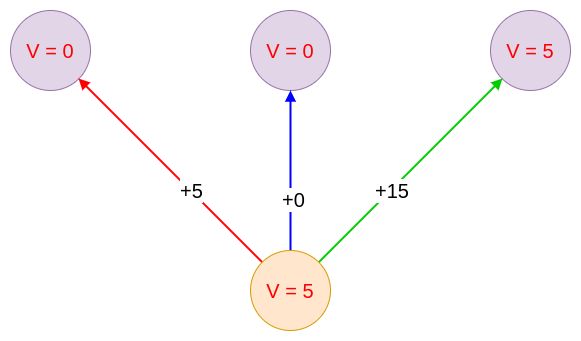

In [5]:
print('Advantage diagram:')
Image('Reinforcement_Learning-101-demo/imgs/Advantage.png')